# Ydata Data Science School
## Linear Regression & Regularization Exercise.


## Outline
In this exercise you will learn the following topics:

1. Refresher on how linear regression is solved in batch and in Gradient Descent
2. Implementation of Ridge Regression
3. Comparing Ridge, Lasso and vanila Linear Regression on a dataset

## Exercise 1 - Ordinary Least Square
* Get the boston housing dataset https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html

* What is $p$? what is $n$ in the above notation? hint: [shape](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.ndarray.shape.html)

* write a model `OrdinaryLinearRegression` which has a propoery $w$ and 3 methods: `fit`, `predict` and `score` (which returns the MSE on a given sample set). Hint: use [numpy.linalg.pinv](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.pinv.html) to be more efficient.

* Fit the model. What is the training MSE?

* Plot a scatter plot where on x-axis plot $Y$ and in the y-axis $\hat{Y}_{OLS}$

* Split the data to 75% train and 25% test 20 times. What is the average MSE now for train and test? Hint: use [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) or [ShuffleSplit](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html).

* Use a t-test to proove that the MSE for training is significantly smaller than for testing. What is the p-value? Hint: use [scipy.stats.ttest_rel](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.ttest_rel.html).

* Write a new class `OrdinaryLinearRegressionGradientDescent` which inherits from `OrdinaryLinearRegression` and solves the problem using gradinet descent. The class should get as a parameter the learning rate and number of iteration. Plot the class convergance. What is the effect of learning rate? How would you find number of iteration automatically? Note: Gradient Descent does not work well when features are not scaled evenly (why?!). Be sure to normalize your features first.

* The following parameters are optional (not mandatory to use):
    * early_stop - True / False boolean to indicate to stop running when loss stops decaying and False to continue.
    * verbose- True/False boolean to turn on / off logging, e.g. print details like iteration number and loss (https://en.wikipedia.org/wiki/Verbose_mode)
    * track_loss - True / False boolean when to save loss results to present later in learning curve graphs

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

print(data.shape)

(506, 13)


- What is $p$? what is $n$ in the above notation?

$n$ - Number of observations or data points (rows in the dataset) = 506.

$p$ - Number of features (columns in the dataset excluding the target variable) = 13.

In [3]:
# * write a model `Ols` which has a propoery $w$ and 3 methods: `fit`, `predict` and `score`.? hint: use [numpy.linalg.pinv](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.pinv.html) to be more efficient.

class Ols(object):
  def __init__(self):
    self.w = None

  @staticmethod
  def pad(X):
    return np.column_stack((np.ones(X.shape[0]), X))

  def fit(self, X, Y):
    #remeber pad with 1 before fitting
    self._fit(X, Y)
    pass

  def _fit(self, X, Y):
    # optional to use this
    X_pad = self.pad(X)
    self.w = np.dot(np.linalg.pinv(X_pad), Y)
    pass

  def predict(self, X):
    #return wx
    return self._predict(X)

  def _predict(self, X):
    # optional to use this
    X_pad = self.pad(X)
    wx = np.dot(X_pad, self.w)
    return wx

  def score(self, X, Y):
    #return MSE
    Y_pred = self.predict(X)
    mse = np.mean((Y - Y_pred)**2)
    return mse

In [4]:
reg = Ols()
reg.fit(data, target)
Y_pred = reg.predict(data)
reg.score(data, target)

21.894831181729206

In [5]:
reg_2 = LinearRegression().fit(data, target)
Y_pred_2 = reg_2.predict(data)
reg_2.score(data, target)

0.7406426641094095

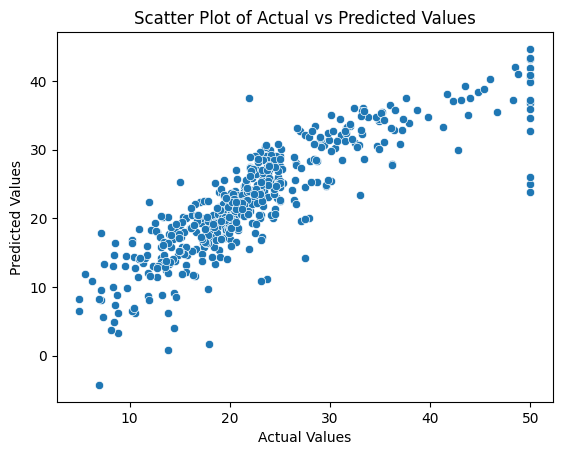

In [6]:
sns.scatterplot(x=target, y=Y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Scatter Plot of Actual vs Predicted Values")
plt.show()

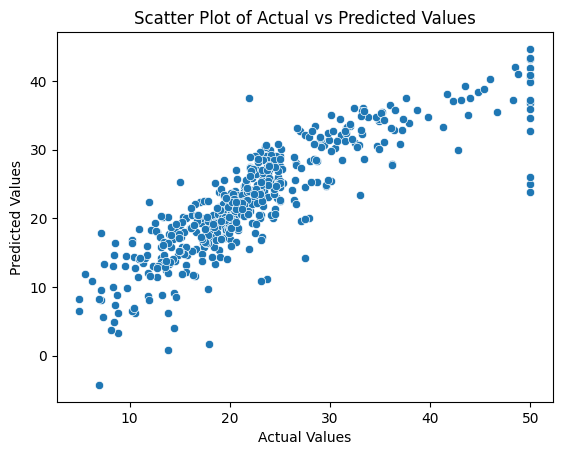

In [7]:
sns.scatterplot(x=target, y=Y_pred_2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Scatter Plot of Actual vs Predicted Values")
plt.show()

In [8]:
num_iterations = 20

train_mse_values = []
test_mse_values = []

for _ in range(num_iterations):

    X_train, X_test, Y_train, Y_test = train_test_split(data, target, test_size=0.25, random_state=None)

    # Fit the model on the training data
    reg.fit(X_train, Y_train)

    # Calculate MSE for the training set
    train_mse = reg.score(X_train, Y_train)
    train_mse_values.append(train_mse)

    # Calculate MSE for the test set
    test_mse = reg.score(X_test, Y_test)
    test_mse_values.append(test_mse)

# Calculate average MSE for train and test sets
average_train_mse = np.mean(train_mse_values)
average_test_mse = np.mean(test_mse_values)

print(f"Average Train MSE: {average_train_mse}")
print(f"Average Test MSE: {average_test_mse}")

Average Train MSE: 21.9656418428245
Average Test MSE: 22.68635771675678


In [9]:
from scipy import stats
stats.ttest_rel(train_mse_values, test_mse_values)

TtestResult(statistic=-0.5374327925674055, pvalue=0.5972075576902018, df=19)

In [10]:
# Write a new class OlsGd which solves the problem using gradinet descent.
# The class should get as a parameter the learning rate and number of iteration.
# Plot the loss convergance. for each alpha, learning rate plot the MSE with respect to number of iterations.
# What is the effect of learning rate?
# How would you find number of iteration automatically?
# Note: Gradient Descent does not work well when features are not scaled evenly (why?!). Be sure to normalize your feature first.
class Normalizer():
  def __init__(self):
    self.min_vals = None
    self.max_vals = None    
    pass

  def fit(self, X):
    self.min_vals = np.min(X, axis=0)
    self.max_vals = np.max(X, axis=0)
    pass

  def predict(self, X):
    #check
    if self.min_vals is None or self.max_vals is None:
      raise ValueError("Normalizer not fitted. Call fit method first.")

    #apply normalization
    normalized_X = (X - self.min_vals) / (self.max_vals - self.min_vals)
    return normalized_X

class OlsGd(Ols):

  def __init__(self, learning_rate=.05,
               num_iteration=1000,
               normalize=True,
               early_stop=True,
               verbose=True):
    
    super(OlsGd, self).__init__()
    self.learning_rate = learning_rate
    self.num_iteration = num_iteration
    self.early_stop = early_stop
    self.normalize = normalize
    self.normalizer = Normalizer()
    self.verbose = verbose
    self.losses = None
  
  def _fit(self, X, Y, reset=True, track_loss=True):
    #remeber to normalize the data before starting
    if self.normalize == True:
      self.normalizer.fit(X)
      X = self.normalizer.predict(X)

    X_pad = self.pad(X)
    n_samples, n_features = X_pad.shape
    self.w = np.zeros(n_features)

    self.losses = []

    for i in range(self.num_iteration):
      loss = self._step(X_pad, Y)
      self.losses.append(loss)

      if self.verbose and i % round(self.num_iteration/10) == 0:
        print(f'Iteration {i}, Loss: {loss}')
        

      if self.early_stop and i > 0 and np.abs(self.losses[-1] - self.losses[-2]) < 1e-5:
        if self.verbose:
          print(f'Early stopping at iteration {i}')
        break
    
    
    if track_loss:
        self.plot_convergence(self.losses)
    pass


  def _predict(self, X):
    #remeber to normalize the data before starting
    if self.normalize == True:
      self.normalizer.fit(X)
      X = self.normalizer.predict(X)
    X_pad = self.pad(X)

    wx = np.dot(X_pad, self.w)
    return wx

  def _step(self, X, Y):
    # use w update for gradient descent
    Y_pred = np.dot(X, self.w)
    self.w = self.w - self.learning_rate * (1/X.shape[0]) * np.dot(X.T, (Y_pred - Y))
    loss = np.mean((Y - Y_pred)**2)
    return loss
  
  
  def plot_convergence(self, losses):
    
    plt.plot(range(1, len(losses) + 1), losses)
    plt.xlabel('Iteration')
    plt.ylabel('Mean Squared Error')
    plt.title('Convergence')
    plt.show()

Iteration 0, Loss: 592.1469169960474
Iteration 500, Loss: 22.234350631276328
Iteration 1000, Loss: 21.938924264448946
Iteration 1500, Loss: 21.900945498604965
Early stopping at iteration 1724


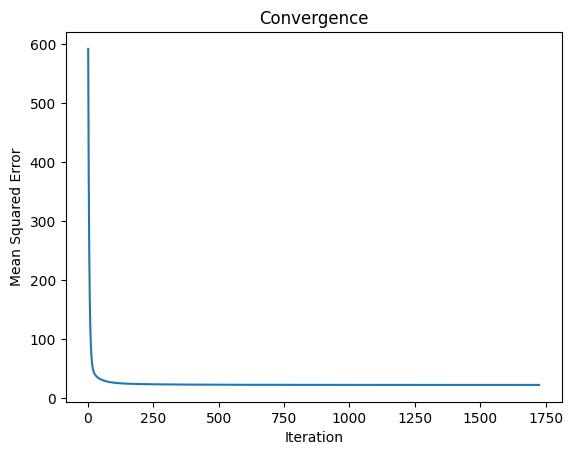

Mean Squared Error on the test set (Gradient Descent): 21.897354830552977


In [11]:
reg_grad = OlsGd(learning_rate=.5, num_iteration=5000)
reg_grad._fit(data, target)
mse = reg_grad.score(data, target)

print(f'Mean Squared Error on the test set (Gradient Descent): {mse}')


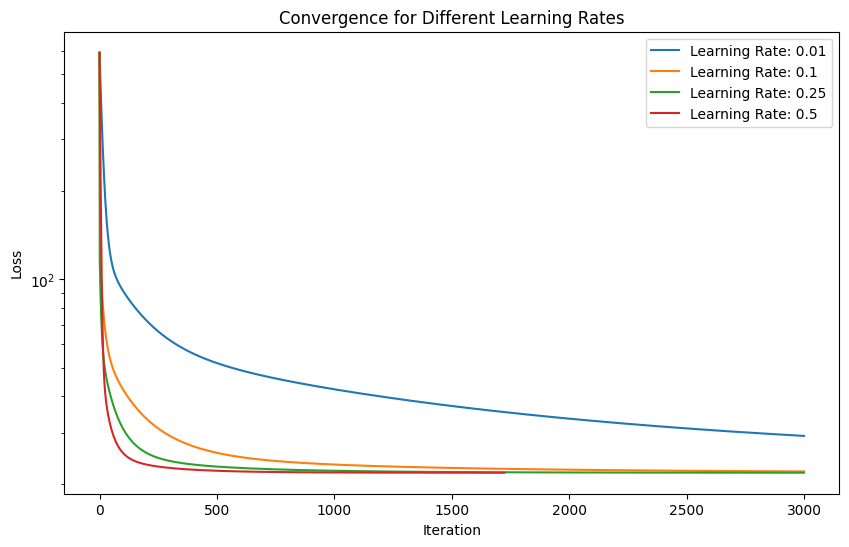

In [12]:
# Assuming data and target are already defined
learning_rates = [0.01, 0.1, 0.25, 0.5]
num_iteration = 3000 

# Initialize a figure
plt.figure(figsize=(10, 6))

# Loop through learning rates
for learning_rate in learning_rates:
    reg_grad = OlsGd(learning_rate=learning_rate, num_iteration=num_iteration, verbose=False)
    reg_grad._fit(data, target, track_loss=False)
    losses = reg_grad.losses 
    
    # Plot the convergence for each learning rate
    plt.plot(losses, label=f'Learning Rate: {learning_rate}')

# Add labels and title
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Convergence for Different Learning Rates')
plt.legend()
plt.yscale('log')
plt.show()

- What is the effect of learning rate?

The learning rate significantly impacts the convergence behavior during optimization. A small learning rate leads to more cautious, but slow convergence. On the other hand, a large learning rate accelerates convergence but can come with the trade-off of potential overshooting and divergence.

From the graph above, it is clear that using a higher lambda value helps the loss function converge to the minimum faster.

- How would you find number of iteration automatically?

We can apply early stopping as a mechanism to automatically determine the number of iterations during gradient descent. By monitoring the change in the loss function between iterations and stopping training when the change falls below a specified threshold, the algorithm adapts dynamically and halts when further iterations may not significantly improve model performance.

## Exercise 2 - Ridge Linear Regression

Recall that ridge regression is identical to OLS but with a L2 penalty over the weights:

$L(y,\hat{y})=\sum_{i=1}^{i=N}{(y^{(i)}-\hat{y}^{(i)})^2} + \lambda \left\Vert w \right\Vert_2^2$

where $y^{(i)}$ is the **true** value and $\hat{y}^{(i)}$ is the **predicted** value of the $i_{th}$ example, and $N$ is the number of examples

* Show, by differentiating the above loss, that the analytical solution is $w_{Ridge}=(X^TX+\lambda I)^{-1}X^Ty$
* Change `OrdinaryLinearRegression` and `OrdinaryLinearRegressionGradientDescent` classes to work also for ridge regression. Either add a parameter, or use inheritance.
* **Bonus: Noise as a regularizer**: Show that OLS (ordinary least square), if one adds multiplicative noise to the features the **average** solution for $W$ is equivalent to Ridge regression. In other words, if $X'= X*G$ where $G$ is an uncorrelated noise with variance $\sigma$ and mean 1, then solving for $X'$ with OLS is like solving Ridge for $X$. What is the interpretation?



In [13]:
# OLS works for ridge regression
class RidgeLs(Ols):
  def __init__(self, ridge_lambda, *wargs, **kwargs):
    super(RidgeLs,self).__init__(*wargs, **kwargs)
    self.ridge_lambda = ridge_lambda

  def _fit(self, X, Y):
    #Closed form of ridge regression
    X_pad = self.pad(np.array(X))
    identity_matrix = np.identity(X_pad.shape[1])
    identity_matrix[0,0] = 0
    regularization_term = self.ridge_lambda * identity_matrix
    self.w = np.linalg.inv(X_pad.T @ X_pad + regularization_term) @ X_pad.T @ Y


# OLR with a gradient descent works for ridge regression
class RidgeLsGd(OlsGd):
  def __init__(self, ridge_lambda, *wargs, **kwargs):
    super(RidgeLsGd,self).__init__(*wargs, **kwargs)
    self.ridge_lambda = ridge_lambda


  def _step(self, X, Y):
    Y_pred = np.dot(X, self.w)
    self.w = self.w - (self.learning_rate * (1/X.shape[0]) * np.dot(X.T, (Y_pred - Y)) + self.w * self.ridge_lambda)
    #self.w = self.w - (self.learning_rate * (1/X.shape[0]) * (X @ self.w - Y) @ X + self.w * self.ridge_lambda)
    loss = np.mean((X @ self.w - Y)**2) + self.ridge_lambda * np.linalg.norm(self.w)**2
    #loss = np.mean((Y - Y_pred)**2)
    return loss

In [14]:
# check
mrls = RidgeLs(0.01)
mrls.fit(data, target)
mse = mrls.score(data, target)
print(f'Mean Squared Error on the test set (Ridge OLS): {mse}')

Mean Squared Error on the test set (Ridge OLS): 21.89487121218299


Iteration 0, Loss: 430.744266600577
Iteration 1000, Loss: 26.120888830691587
Iteration 2000, Loss: 23.85818609573451


Iteration 3000, Loss: 23.253167358593664
Iteration 4000, Loss: 22.968982603382113
Iteration 5000, Loss: 22.80721227601338
Iteration 6000, Loss: 22.706895103081038
Iteration 7000, Loss: 22.641566893746106
Iteration 8000, Loss: 22.597647045757306
Iteration 9000, Loss: 22.567447147156816


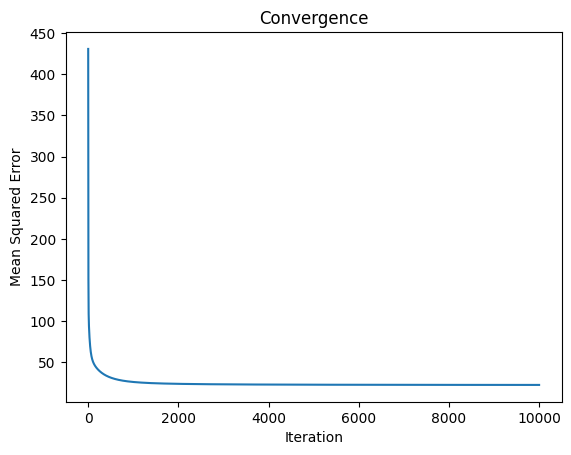

Mean Squared Error on the test set (Ridge Gradient Descent): 22.389386912273896


In [15]:
mrlsg = RidgeLsGd(ridge_lambda=0.0001, early_stop=True, verbose=True, num_iteration=10000)
mrlsg.fit(data, target)
mse = mrlsg.score(data, target)
print(f'Mean Squared Error on the test set (Ridge Gradient Descent): {mse}')

### Use scikitlearn implementation for OLS, Ridge and Lasso

In [16]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

In [17]:
# OLS
ols_model = linear_model.LinearRegression()
ols_model.fit(data, target)

# Make predictions on the test set
y_pred_ols = ols_model.predict(data)

# Evaluate the model's performance using MSE
print(f'MSE for OLS: {mean_squared_error(target, y_pred_ols)}')

# Ridge
ridge_model = linear_model.Ridge(alpha=0.1)
ridge_model.fit(data, target)

# Make predictions on the test set
y_pred_ridge = ridge_model.predict(data)

# Evaluate the model's performance using MSE
print(f'MSE for Ridge: {mean_squared_error(target, y_pred_ridge)}')

# Lasso
lasso_model = linear_model.Lasso(alpha=0.1)
lasso_model.fit(data, target)

# Make predictions on the test set
y_pred_lasso = lasso_model.predict(data)

# Evaluate the model's performance using MSE
print(f'MSE for Lasso: {mean_squared_error(target, y_pred_lasso)}')

MSE for OLS: 21.894831181729202
MSE for Ridge: 21.898408197589955
MSE for Lasso: 23.047932913211717


In [41]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

sigma = 1

# Ordinary Linear Regression
G = np.random.normal(loc=1, scale=sigma, size=(X_train.shape[1],))

X_train_noise = X_train * G


ols_model = Ols()
ols_model.fit(X_train_noise, y_train)
ols_pred = ols_model.predict(X_test)
ols_mse = mean_squared_error(y_test, ols_pred)
print(ols_model.w)
print("OLS MSE:", ols_mse)


# Ridge Regression with equivalent parameter
var_X = np.var(data)  # Variance of the original features
alpha = sigma / var_X  # Ridge parameter

ridge_model = RidgeLs(ridge_lambda=alpha)
ridge_model.fit(X_train, y_train)
ridge_pred = ridge_model.predict(X_test)
ridge_mse = mean_squared_error(y_test, ridge_pred)
print(ridge_model.w)
print("Ridge MSE:", ridge_mse)





[ 3.02467510e+01  3.64933612e-01  1.39002152e-01  1.85971420e-02
  6.10349549e+00 -1.10013591e+01  1.42844916e+01 -1.51087586e-02
 -3.80321804e+00  1.07950103e-01 -3.41512979e-03 -2.79330536e+00
  2.22844443e-02 -4.92957626e-01]
OLS MSE: 834.295445779582
[ 3.02462983e+01 -1.13055586e-01  3.01106424e-02  4.03779086e-02
  2.78442106e+00 -1.72019782e+01  4.43883891e+00 -6.29688058e-03
 -1.44785601e+00  2.62428505e-01 -1.06468544e-02 -9.15448701e-01
  1.23513600e-02 -5.08572607e-01]
Ridge MSE: 24.291122223546576
